Epoch 0: Loss = 1.0986786263667754
Epoch 100: Loss = 1.003125767627413
Epoch 200: Loss = 0.9482453019089346
Epoch 300: Loss = 0.8968105770645909
Epoch 400: Loss = 0.8487768203600707
Epoch 500: Loss = 0.8040626647639604
Epoch 600: Loss = 0.7625535370419343
Epoch 700: Loss = 0.7241076261008869
Epoch 800: Loss = 0.6885625479231794
Epoch 900: Loss = 0.6557420812755024
Trained Weights: [ 0.86364845  1.10073464 -0.87267124]


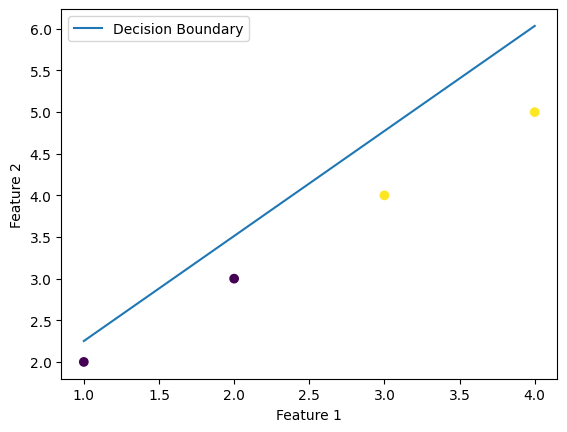

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm dự đoán
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

# Hàm mất mát (Cross-Entropy Loss)
def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Hàm gradient
def gradient(X, y_true, y_pred):
    return np.dot(X.T, (y_pred - y_true)) / len(y_true)

# Huấn luyện model
def train(X_train, y_train, learning_rate=0.01, epochs=1000):
    # Khởi tạo trọng số ngẫu nhiên
    weights = np.random.randn(X_train.shape[1])

    # Huấn luyện qua từng epoch
    for epoch in range(epochs):
        # Dự đoán và tính toán gradient
        y_pred = predict(X_train, weights)
        grad = gradient(X_train, y_train, y_pred)

        # Cập nhật trọng số
        weights -= learning_rate * grad

        # Tính toán và in ra giá trị mất mát sau mỗi 100 epoch
        if epoch % 100 == 0:
            current_loss = loss(y_train, y_pred)
            print(f"Epoch {epoch}: Loss = {current_loss}")

    return weights

# Dữ liệu mô phỏng
X_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
y_train = np.array([0, 0, 1, 1])

# Thêm cột 1 vào dữ liệu để tính toán bias
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))

# Huấn luyện model
trained_weights = train(X_train, y_train)

# In trọng số đã học được
print("Trained Weights:", trained_weights)

# Trực quan hóa kết quả
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Vẽ đường phân cách (quyết định) của mô hình
x_values = [np.min(X_train[:,1]), np.max(X_train[:,1])]
y_values = - (trained_weights[0] + np.dot(trained_weights[1], x_values)) / trained_weights[2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.legend()
plt.show()


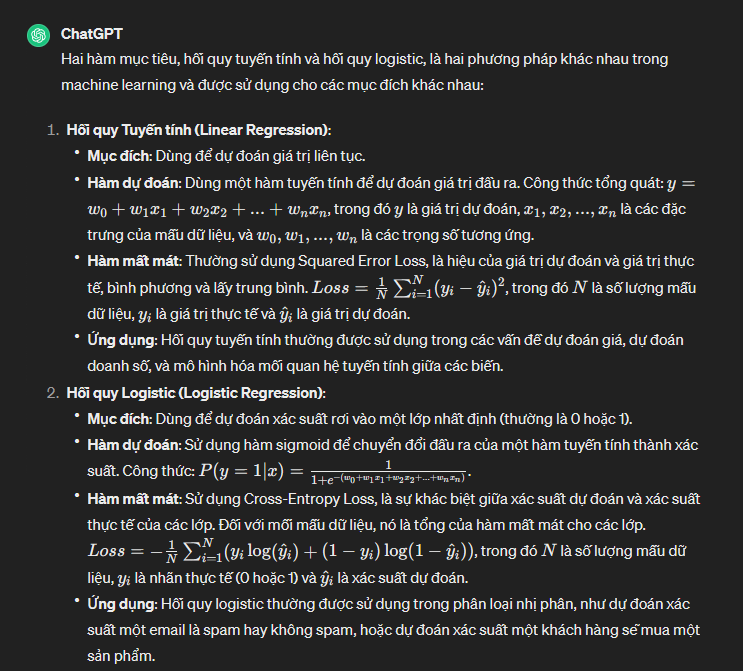

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Hàm dự đoán
def predict(X, weights):
    z = np.dot(X, weights)
    return sigmoid(z)

# Hàm mất mát (Cross-Entropy Loss)
def loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Hàm gradient
def gradient(X, y_true, y_pred):
    return np.dot(X.T, (y_pred - y_true)) / len(y_true)

# Huấn luyện model
def train(X_train, y_train, learning_rate=0.01, epochs=1000):
    # Khởi tạo trọng số ngẫu nhiên
    weights = np.random.randn(X_train.shape[1])

    # Huấn luyện qua từng epoch
    for epoch in range(epochs):
        # Dự đoán và tính toán gradient
        y_pred = predict(X_train, weights)
        grad = gradient(X_train, y_train, y_pred)

        # Cập nhật trọng số
        weights -= learning_rate * grad

        # Tính toán và in ra giá trị mất mát sau mỗi 100 epoch
        if epoch % 100 == 0:
            current_loss = loss(y_train, y_pred)
            print(f"Epoch {epoch}: Loss = {current_loss}")

    return weights

# Load dữ liệu từ file CSV
iowa_file_path = './data_logistic.csv'
data = pd.read_csv(iowa_file_path, header=None)  # Đọc dữ liệu mà không có hàng đầu tiên là hàng tiêu đề

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X = data.iloc[:, :-1].values  # Lấy tất cả các cột trừ cột cuối cùng là cột nhãn
y = data.iloc[:, -1].values   # Lấy cột cuối cùng là cột nhãn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Thêm cột 1 vào dữ liệu để tính toán bias
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Huấn luyện model trên tập huấn luyện
trained_weights = train(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_test = predict(X_test, trained_weights)

# Chuyển đổi dự đoán thành nhãn nhị phân (0 hoặc 1) dựa trên ngưỡng 0.5
y_pred_binary = np.where(y_pred_test >= 0.5, 1, 0)

# Độ chính xác trên tập kiểm tra
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy on test set:", accuracy)


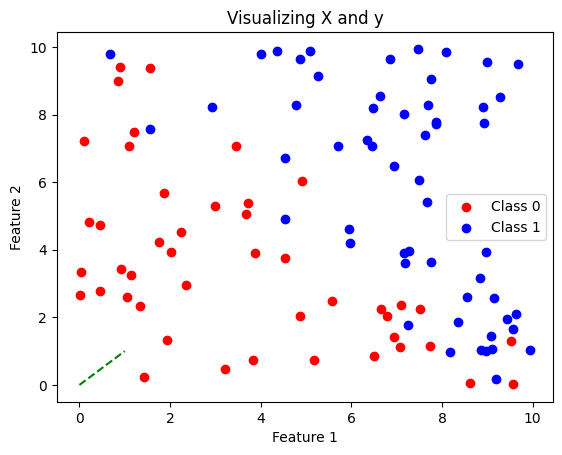

cost [63.75512615]
cost [193.89144412]
cost [nan]
cost [437.34385936]
cost [173.29981648]
cost [nan]
cost [263.86657375]
cost [512.3332698]
cost [nan]
cost [379.39149432]
cost [238.55020184]
cost [nan]
cost [245.94856827]
cost [481.69486825]
cost [nan]
cost [369.71537066]
cost [221.7684963]
cost [nan]
cost [139.43755307]
cost [595.66133931]
cost [nan]
cost [314.33155006]
cost [272.26055489]
cost [nan]
cost [311.43663169]
cost [254.70374855]
cost [nan]
cost [280.55162226]
cost [288.55999936]
cost [nan]
cost [338.10138373]
cost [178.21854408]
cost [nan]
cost [130.14682618]
cost [502.25194707]
cost [nan]
cost [321.76209376]
cost [168.62305777]
cost [nan]
cost [217.48863666]
cost [337.9316329]
cost [nan]
cost [366.8884226]
cost [94.43542912]
cost [311.42105132]
cost [170.49754042]
cost [nan]
cost [374.72680727]
cost [60.02735787]
cost [258.41216115]
cost [244.84697883]
cost [nan]
cost [387.8158813]
cost [44.6588112]
cost [102.55267807]
cost [459.40344535]
cost [nan]
cost [309.13940013]
cos

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20892\1666941985.py:52: RuntimeWarning: divide by zero encountered in log
  cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_20892\1666941985.py:52: RuntimeWarning: invalid value encountered in multiply
  cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))


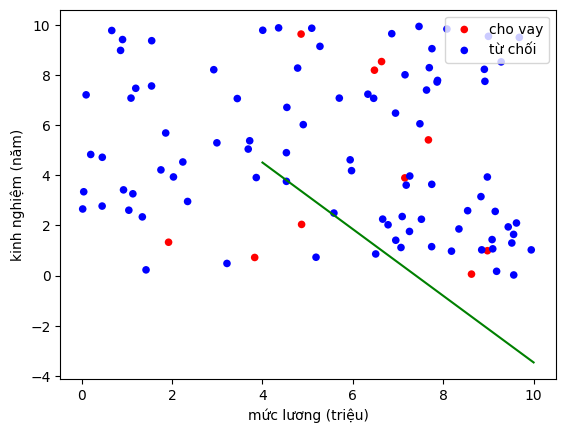

In [3]:
# Thêm thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Load data từ file csv
data = pd.read_csv('data_logistic.csv').values
N, d = data.shape
x = data[:, 0:d-1].reshape(-1, d-1)
y = data[:, 2].reshape(-1, 1)

import matplotlib.pyplot as plt

# Tách dữ liệu thành hai danh sách riêng biệt cho các lớp
class_0 = [x[i] for i in range(len(x)) if y[i][0] == 0]
class_1 = [x[i] for i in range(len(x)) if y[i][0] == 1]

# Trực quan hóa dữ liệu
plt.scatter([point[0] for point in class_0], [point[1] for point in class_0], color='red', label='Class 0')
plt.scatter([point[0] for point in class_1], [point[1] for point in class_1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualizing X and y')
plt.legend()
# Vẽ đường chéo
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.show()


# Vẽ data bằng scatter
plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
plt.legend(loc=1)
plt.xlabel('mức lương (triệu)')
plt.ylabel('kinh nghiệm (năm)')

# Thêm cột 1 vào dữ liệu x
x = np.hstack((np.ones((N, 1)), x))
w = np.array([0.,0.1,0.1]).reshape(-1,1)

# Sử dụng logistic regression bước 2
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01
for i in range(1, numOfIteration):
    # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)
    print('cost', cost[i])

# Vẽ đường phân cách.
t = 0.5
plt.plot((4, 10), (-(w[0]+4*w[1]+ np.log(1/t-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/t-1))/w[2]), 'g')
plt.show()

# Lưu weight dùng numpy.save(), định dạng '.npy'
np.save('weight_logistic.npy', w)

# Load weight từ file '.npy'
w = np.load('weight_logistic.npy')

# # Logistic Regression sử dụng thư viện sklearn
# from sklearn.linear_model import LogisticRegression

# # Load data từ file csv
# data = pd.read_csv('data_logistic.csv').values
# N, d = data.shape
# x = data[:, 0:d-1].reshape(-1, d-1)
# y = data[:, 2].reshape(-1, 1)

# # Vẽ data bằng scatter
# plt.scatter(x[:10, 0], x[:10, 1], c='red', edgecolors='none', s=30, label='cho vay')
# plt.scatter(x[10:, 0], x[10:, 1], c='blue', edgecolors='none', s=30, label='từ chối')
# plt.legend(loc=1)
# plt.xlabel('mức lương (triệu)')
# plt.ylabel('kinh nghiệm (năm)')

# # Tạo mô hình Logistic Regression và train
# logreg = LogisticRegression()
# logreg.fit(x, y)

# # Lưu các biến của mô hình vào mảng
# wg = np.zeros((3, 1))
# wg[0, 0] = logreg.intercept_
# wg[1:, 0] = logreg.coef_

# # Vẽ đường phân cách
# t = 0.5
# plt.plot((4, 10), (-(wg[0]+4*[1]+ np.log(1/t-1))/wg[2], -(wg[0] + 10*wg[1]+ np.log(1/t-1))/wg[2]), 'g')
# plt.show()

# # Lưu các tham số dùng numpy.savez(), định dạng '.npz'
# np.savez('w_logistic.npz', a=logreg.intercept_, b=logreg.coef_)

# # Load các tham số từ file '.npz'
# k = np.load('w_logistic.npz')
# logreg.intercept_ = k['a']
# logreg.coef_ = k['b']



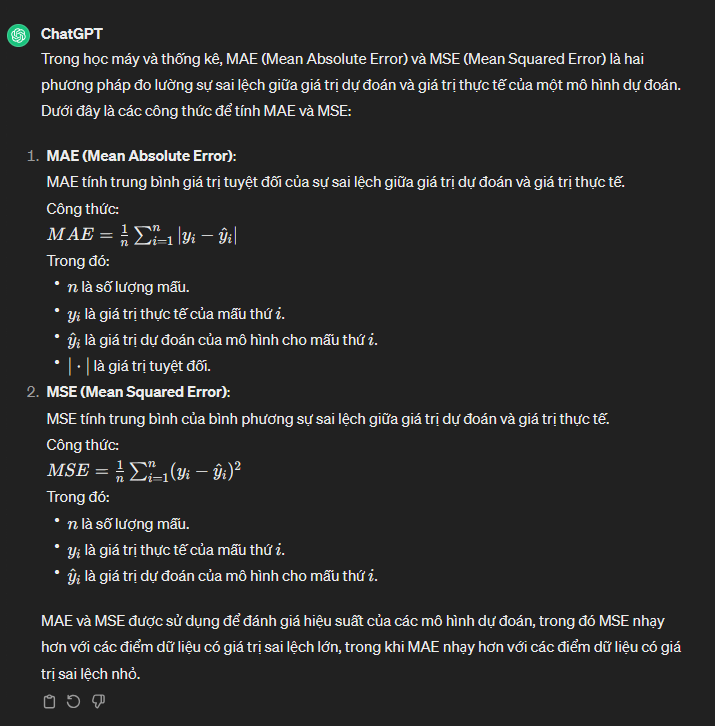